# ```Post Prunning```

```Import Libraries & Data Processing```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = sns.load_dataset('iris')

In [3]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


```Conversting string values to integer using LabelEncoder```

In [4]:
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

In [5]:
dataset['species'] = lable.fit_transform(dataset['species'])

In [6]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
dataset['species'].unique()

array([0, 1, 2])

```Split dataset in to "Independent" & "Dependent" variable```

In [8]:
X = dataset.iloc[:,:-1] # or X = dataset.drop('species', axis=1)
y = dataset['species']

```Split dataset into "Test" & "Train" data```

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=64,test_size=0.15, shuffle=True)

```Import & Fit the Model - Decision Tree Classifer```

In [10]:
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier(max_depth=2)

In [11]:
treemodel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

```Generating Tree structure for Decision Tree Classifier & Make prediction```

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.666\nsamples = 127\nvalue = [41, 41, 45]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.499\nsamples = 86\nvalue = [0, 41, 45]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.165\nsamples = 44\nvalue = [0, 40, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.046\nsamples = 42\nvalue = [0, 1, 41]')]

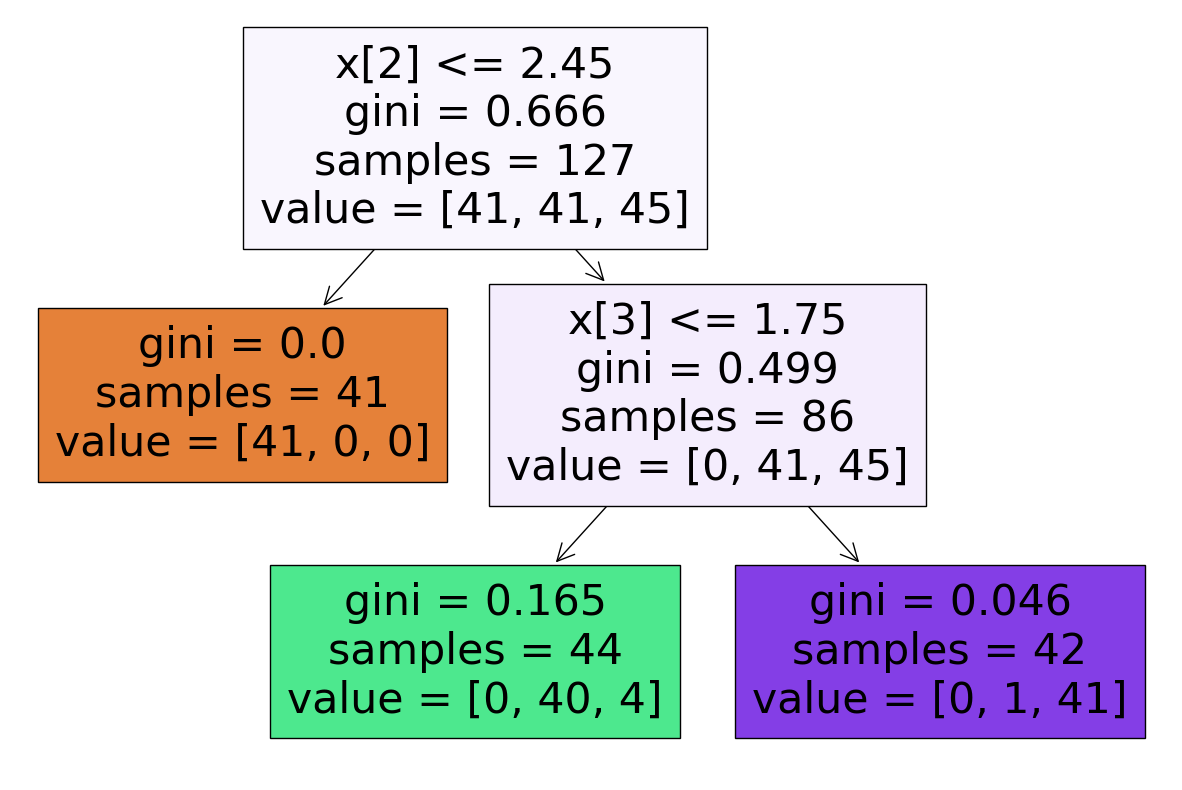

In [12]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel, filled=True)

In [13]:
pred = treemodel.predict(X_test)
pred

array([1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 0, 1, 2, 0, 1, 1, 2, 0, 0,
       1])

```Checking accuracy score & classification report```

In [14]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(pred, y_test)
score

0.9565217391304348

In [15]:
report = classification_report(pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.90      0.95        10
           2       0.80      1.00      0.89         4

    accuracy                           0.96        23
   macro avg       0.93      0.97      0.95        23
weighted avg       0.97      0.96      0.96        23



# ```Pre Pruning```

```Refer Implementation of Post Prunning till - Split dataset into "Test" & "Train" data```

```Import model - DecisionTreeClassifier```

In [16]:
from sklearn.tree import DecisionTreeClassifier
treemodel2 = DecisionTreeClassifier()

```Hyperparameter tuning - parameters - Pre Prunning```

In [17]:
parameter = {
     'criterion':['gini', 'entropy', 'log_loss'],
     'splitter':['best', 'random'],
     'max_depth':[1,2,3,4,5],
     'min_samples_split':[2,5,10],
     'min_samples_leaf':[1,5,10],
     'max_features':['auto', 'sqrt', 'log2'],
     'min_impurity_decrease':[0.0, 0.1],
     'random_state':[42, 123],
     'max_leaf_nodes':[None, 10, 20, 50, 100]
}

```Identify best parameter - using GridSearchCV```

In [18]:
from sklearn.model_selection import GridSearchCV
gridCV = GridSearchCV(treemodel2, param_grid=parameter, cv=5, scoring='accuracy')

In [19]:
gridCV.fit(X_train, y_train)

c:\Users\sujit maity\Anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
27000 fits failed out of a total of 81000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sujit maity\Anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sujit maity\Anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\sujit maity\Anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\s

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 50, 100],
                         'min_impurity_decrease': [0.0, 0.1],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'random_state': [42, 123],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [20]:
gridCV.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 123,
 'splitter': 'random'}

In [21]:
pred2 = gridCV.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, classification_report
score2 = accuracy_score(pred2, y_test)
score2

0.9565217391304348

In [23]:
report2 = classification_report(pred2, y_test)
print(report2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      1.00      0.94         8
           2       1.00      0.83      0.91         6

    accuracy                           0.96        23
   macro avg       0.96      0.94      0.95        23
weighted avg       0.96      0.96      0.96        23



In [24]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.90      0.95        10
           2       0.80      1.00      0.89         4

    accuracy                           0.96        23
   macro avg       0.93      0.97      0.95        23
weighted avg       0.97      0.96      0.96        23



In [25]:
print(report2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      1.00      0.94         8
           2       1.00      0.83      0.91         6

    accuracy                           0.96        23
   macro avg       0.96      0.94      0.95        23
weighted avg       0.96      0.96      0.96        23



In [26]:
predict = gridCV.predict(X_train) # Train Accuracy

In [27]:
pre = classification_report(predict, y_train)

In [28]:
print(pre)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.90      0.93      0.91        40
           2       0.93      0.91      0.92        46

    accuracy                           0.94       127
   macro avg       0.95      0.95      0.95       127
weighted avg       0.95      0.94      0.94       127

